In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [49]:
df=pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")

In [50]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [51]:
df.shape

(32581, 12)

# **Data Preprocessing**

In [52]:
print("Null Values in the dataset : ")
print(df.isnull().sum())

Null Values in the dataset : 
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [53]:
categorial_data=[x for x in df.columns if df[x].dtype=='O']
categorial_data

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [54]:
numeric_data=[x for x in df.columns if x not in categorial_data]
numeric_data

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [55]:
features_with_na=[x for x in df.columns if df[x].isnull().sum()>0]
for feature in features_with_na:
    print(feature,": ",df[feature].isnull().sum())

person_emp_length :  895
loan_int_rate :  3116


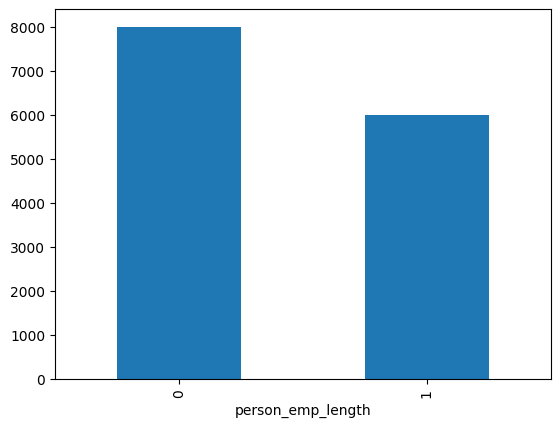

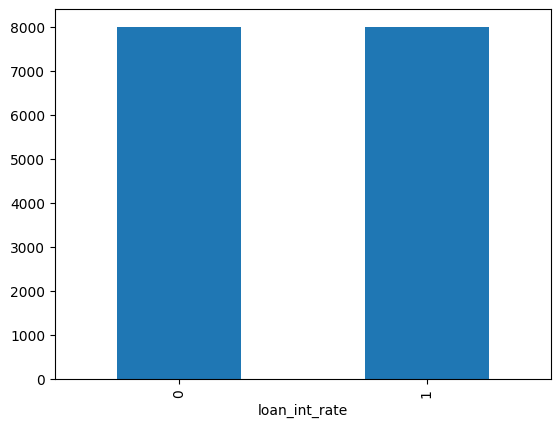

In [56]:
for feature in features_with_na:
    data=df.copy()
    
    data[feature]= np.where(df[feature].isnull(),1,0)
    
    data.groupby(feature)['loan_amnt'].median().plot.bar()
    plt.show()

# **Removing Null Values of interest rate in relation to loan Grade**

In [57]:
mean_interest= df.groupby('loan_grade')['loan_int_rate'].mean()
mean_interest


loan_grade
A     7.327651
B    10.995555
C    13.463542
D    15.361448
E    17.009455
F    18.609159
G    20.251525
Name: loan_int_rate, dtype: float64

In [58]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_grade'].map(mean_interest))

# Filling Nulll Values of Person Employeement length

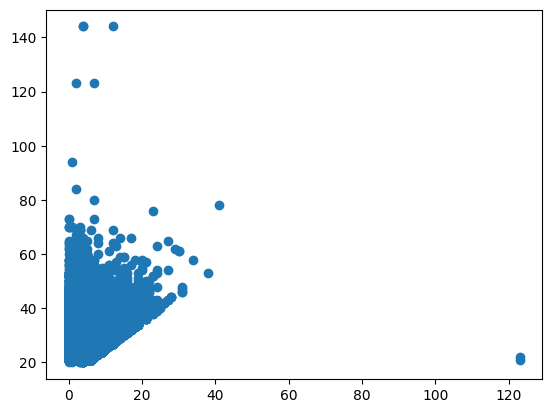

In [59]:
plt.scatter(df['person_emp_length'],df['person_age'])

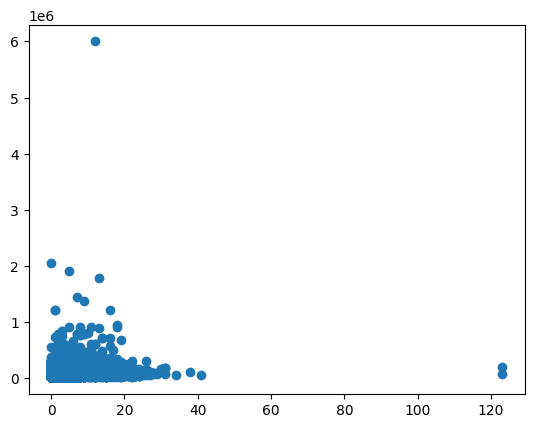

In [60]:
plt.scatter(df['person_emp_length'],df['person_income'])

In [61]:
df = df.drop(df[df['person_emp_length'] >100].index)

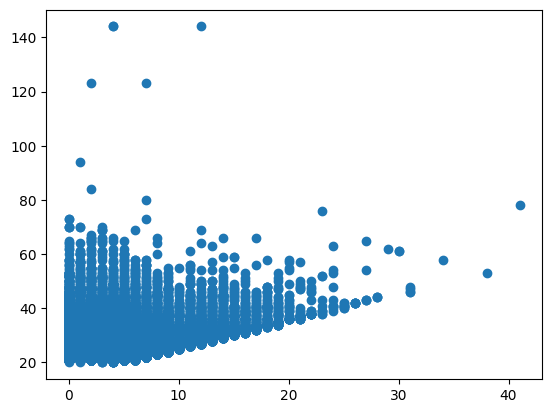

In [62]:
plt.scatter(df['person_emp_length'],df['person_age'])

In [63]:
df['person_emp_length'].fillna(df['person_emp_length'].mean(),inplace=True)

In [64]:
df[features_with_na].isnull().sum()

person_emp_length    0
loan_int_rate        0
dtype: int64

In [65]:
df[features_with_na].head(20)

,person_emp_length,loan_int_rate
1,5.0,11.14
2,1.0,12.87
3,4.0,15.23
4,8.0,14.27
5,2.0,7.14
6,8.0,12.42
7,5.0,11.11
8,8.0,8.90
9,6.0,14.74
10,6.0,10.37


# **Categorial Data**

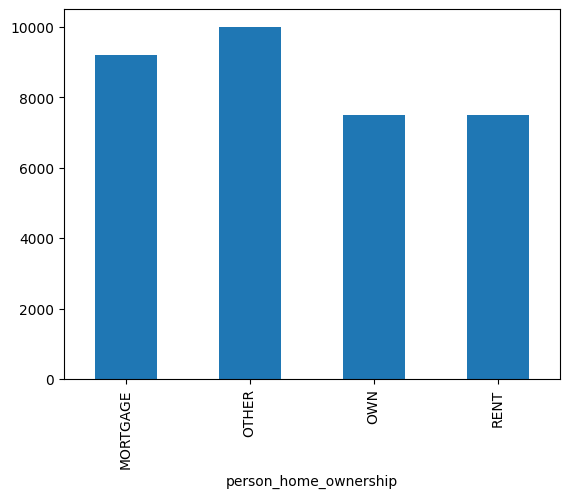

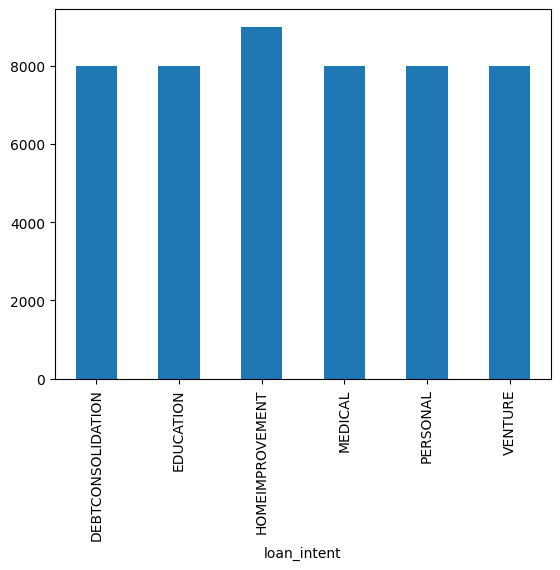

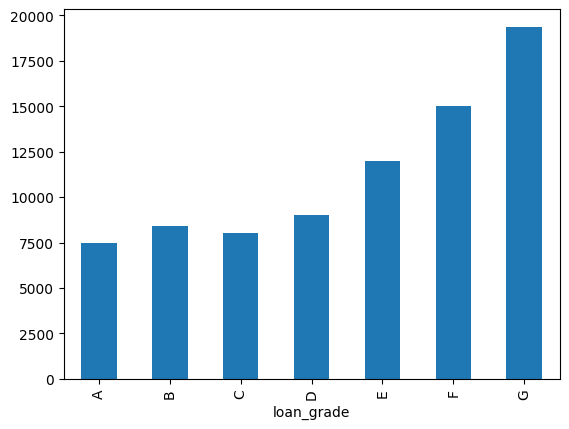

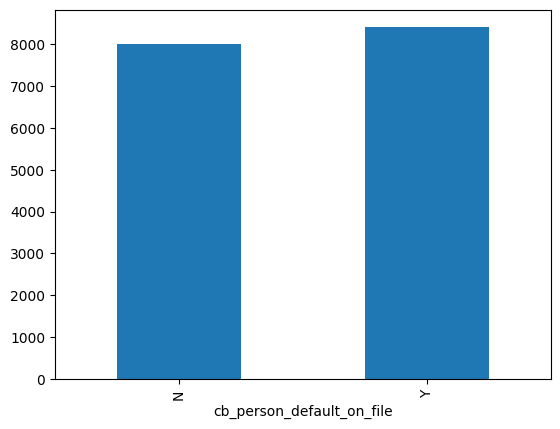

In [66]:
for feature in categorial_data:
    data=df.copy()
    
    data.groupby(feature)['loan_amnt'].median().plot.bar()
    plt.show()
    

# **Numerical Data**

In [67]:
numeric_data

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [68]:
discrete_feature=[feature for feature in df[numeric_data].columns if len(df[feature].unique())<25]
discrete_feature

['loan_status']


there are no **Discrete Features** in the dataset all the numeric features are **Continous Features**

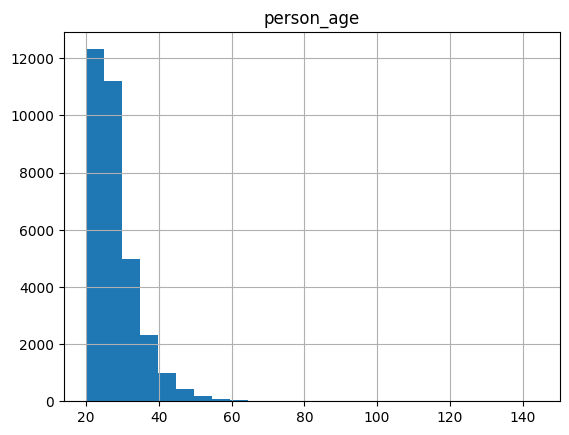

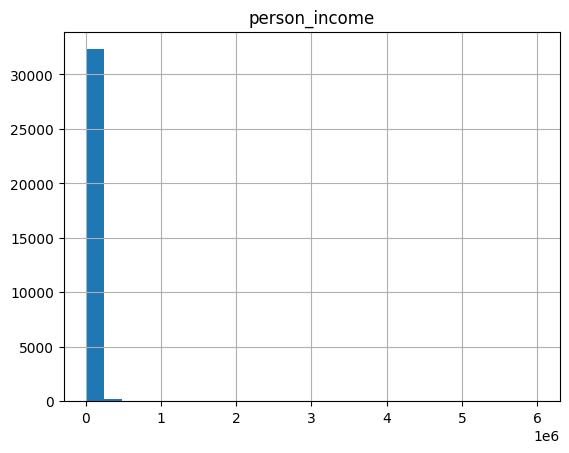

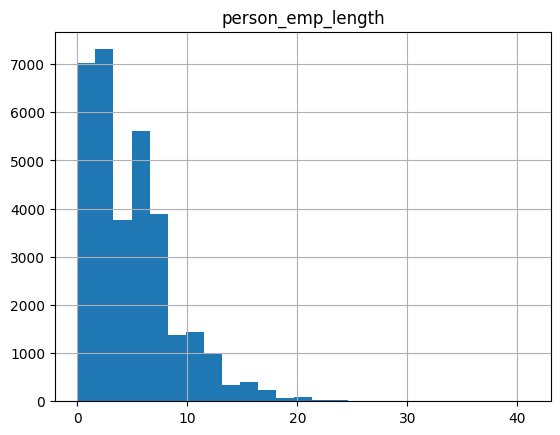

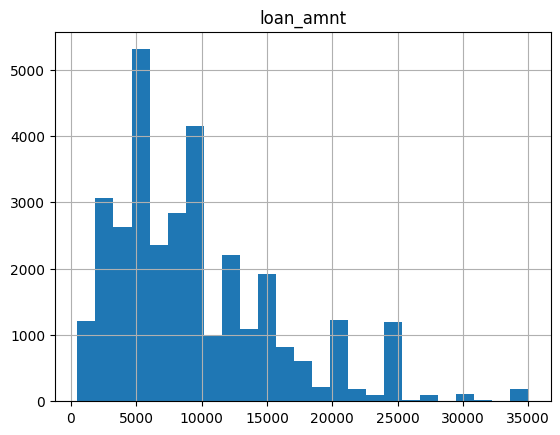

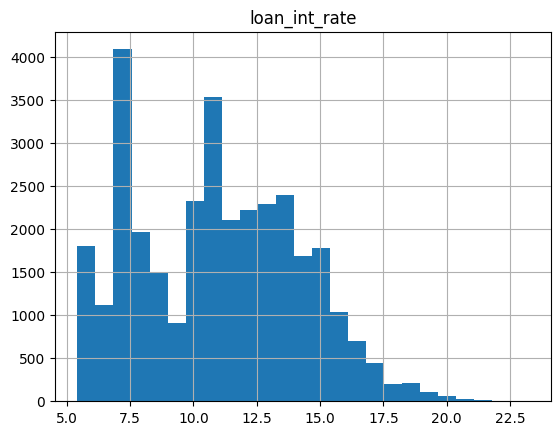

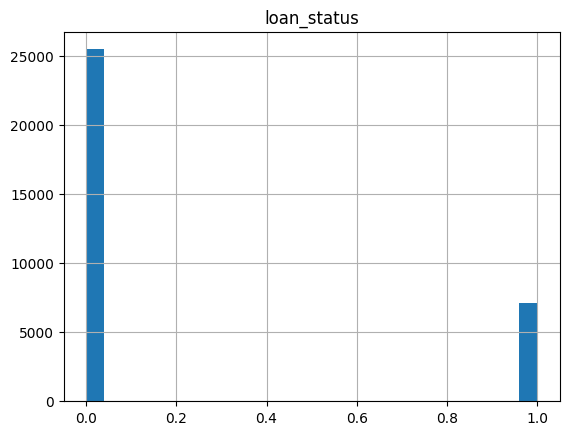

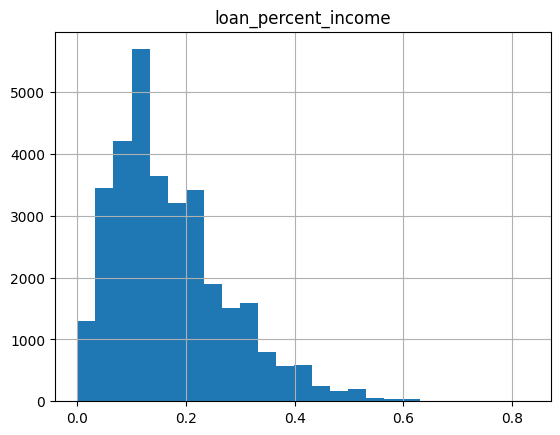

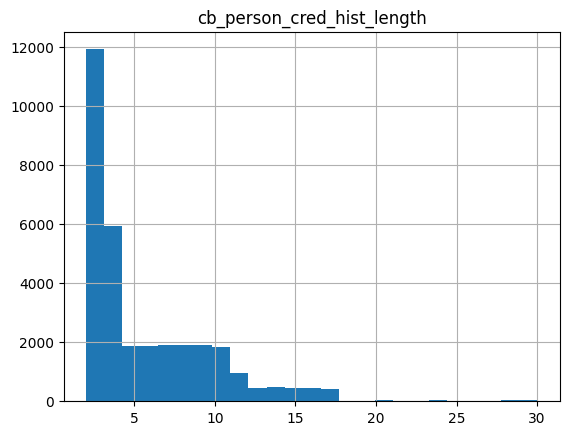

In [69]:
for feature in numeric_data:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()


as we can see the data is right skewed therefore we will go with log Transformation


In [70]:
df_log_T=np.log1p(df[numeric_data])

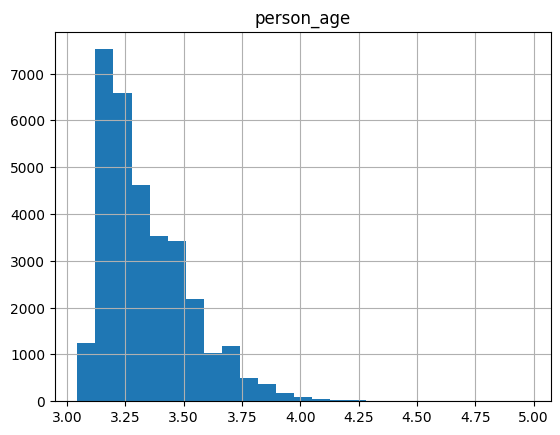

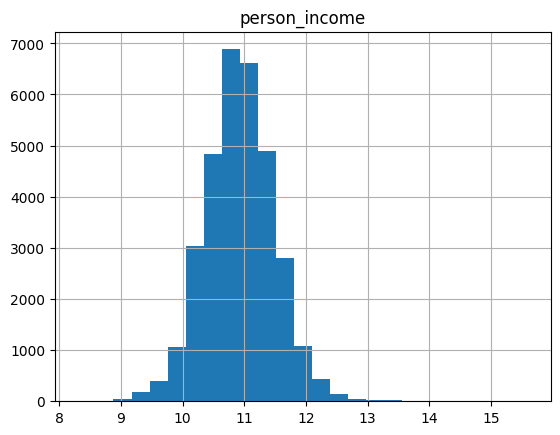

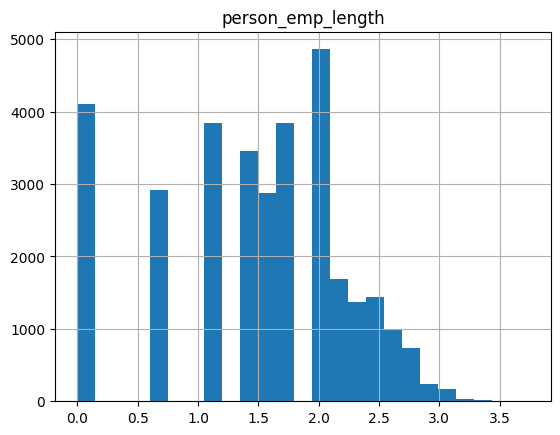

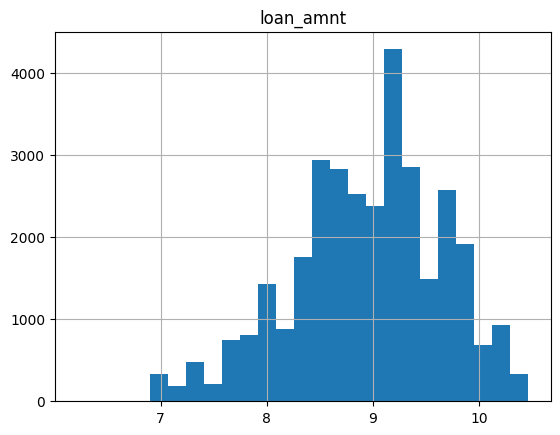

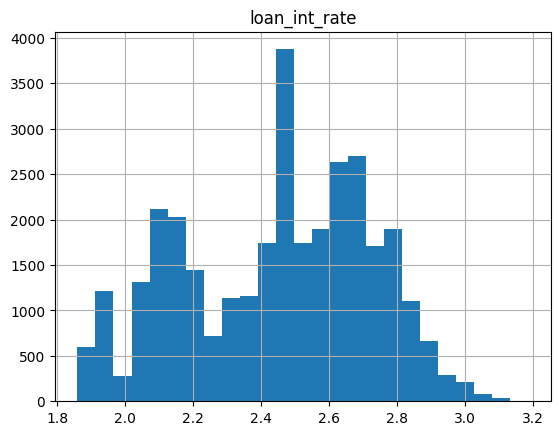

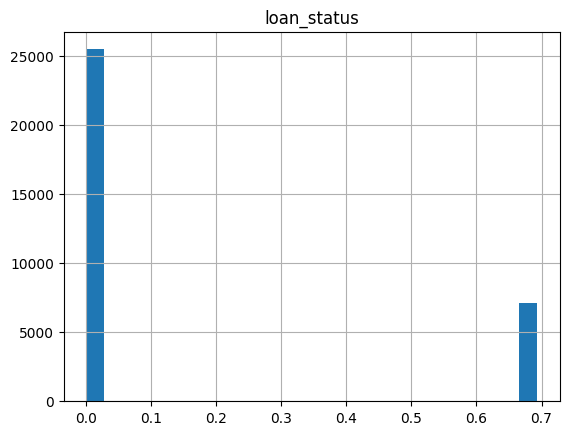

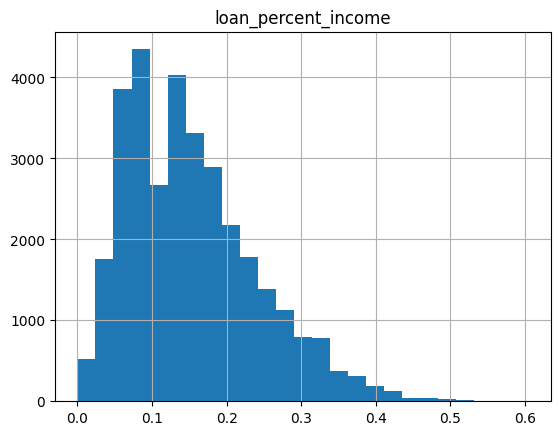

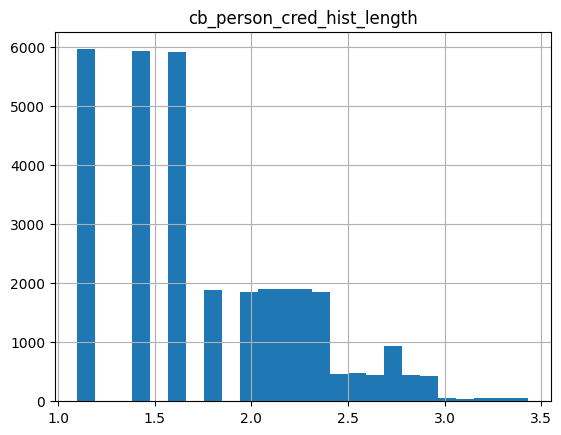

In [71]:
for feature in numeric_data:
    data=df_log_T.copy()
    data[feature].hist(bins=25)
    plt.title(feature)
    plt.show()

In [72]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2


In [73]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
home_ownership=l.fit_transform(df['person_home_ownership'])
loan_intent=l.fit_transform(df['loan_intent'])
loan_grade=l.fit_transform(df['loan_grade'])
previous_default=l.fit_transform(df['cb_person_default_on_file'])


In [74]:
df.drop(['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file'],axis=1,inplace=True)

In [75]:
df['home_ownership']= home_ownership
df['loan_intent']= loan_intent
df['loan_grade']= loan_grade
df['previous_default']= previous_default

In [76]:
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,home_ownership,loan_intent,loan_grade,previous_default
1,21,9600,5.0,1000,11.14,0,0.10,2,2,1,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,3,2,0
3,23,65500,4.0,35000,15.23,1,0.53,2,3,3,2,0
4,24,54400,8.0,35000,14.27,1,0.55,4,3,3,2,1
5,21,9900,2.0,2500,7.14,1,0.25,2,2,5,0,0


In [80]:
y=df['loan_status']
df.drop('loan_status',axis=1,inplace=True)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(df)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [85]:
x_train.shape,y_train.shape

((26063, 11), (26063,))

In [87]:
from sklearn.linear_model import LinearRegression

In [122]:
Lr=LinearRegression()

In [123]:
model=Lr.fit(x_train,y_train)

In [124]:
model.score(x_test,y_test)

0.2979907873389849

In [93]:
y_pred=model.predict(x_test)

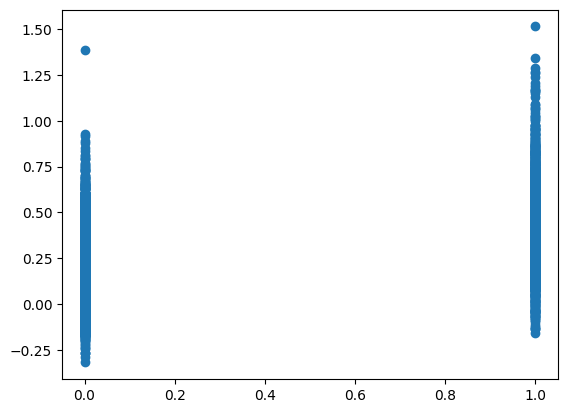

In [95]:
plt.scatter(y_test,y_pred)

In [102]:
from sklearn import svm
model_svm=svm.SVC(kernel='linear')
model_svm.fit(x_train,y_train)
model_svm.score(x_test,y_test)

0.8471454880294659

In [103]:
y_pred=model_svm.predict(x_test)

In [113]:
df_y=pd.DataFrame()
df_y['y_test']=y_test
df_y['y_pred']=y_pred
df_y.head(20)

,y_test,y_pred
19448,0,0
17530,1,1
8723,0,0
26749,1,1
6236,1,0
23061,0,0
12349,0,0
25880,0,0
32397,0,0
5684,0,0


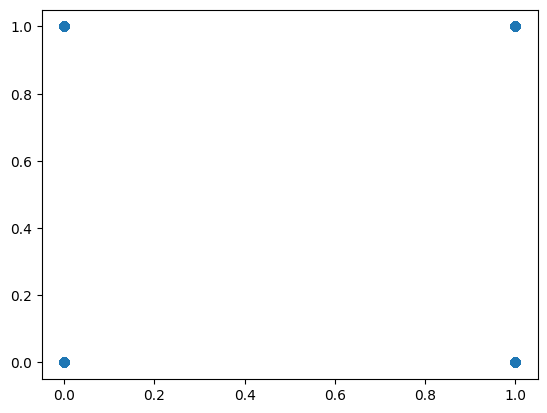

In [106]:
plt.scatter(y_test,y_pred)

In [131]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(max_iter=100)
model_sgd.fit(x_train, y_train)
y_pred_sgd=model_sgd.predict(x_test)

In [133]:
model_sgd.score(x_test,y_test)

0.848987108655617

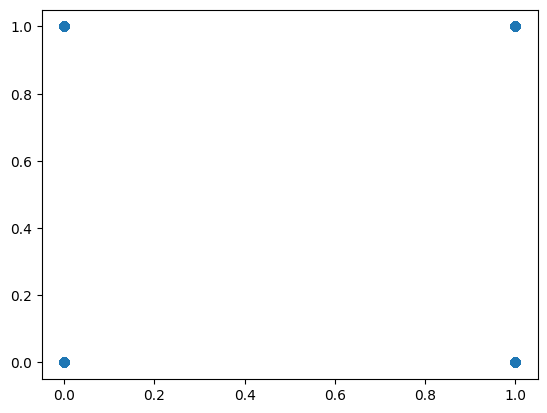

In [132]:
plt.scatter(y_test,y_pred_sgd)

In [134]:
import tensorflow as tf
from tensorflow import keras


In [145]:
input_shape=[x_train.shape[1]]
input_shape


[11]

In [153]:
nn_model=keras.models.Sequential([
    tf.keras.layers.Dense(units=64,input_shape=input_shape,activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [164]:
nn_model.compile(optimizer='adam',loss="mean_squared_error",metrics=['accuracy'])


In [172]:
history=nn_model.fit(x_train,y_train,epochs=10,batch_size=16)

Epoch 1/10
1629/1629 [==============================] - 3s 2ms/step - loss: 0.0755 - accuracy: 0.9095
Epoch 2/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0744 - accuracy: 0.9104
Epoch 3/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0730 - accuracy: 0.9118
Epoch 4/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9135
Epoch 5/10
1629/1629 [==============================] - 3s 2ms/step - loss: 0.0719 - accuracy: 0.9131
Epoch 6/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0712 - accuracy: 0.9153
Epoch 7/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0710 - accuracy: 0.9136
Epoch 8/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.0700 - accuracy: 0.9165
Epoch 9/10
1629/1629 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9165
Epoch 10/10
1629/1629 [==============================] - 4s 2ms/step - loss: 0.069

In [167]:
y_pred=nn_model.predict(x_test)

204/204 [==============================] - 0s 2ms/step


In [169]:
nn_model.evaluate(x_test,y_test)

204/204 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9073


[0.07672613859176636, 0.907305121421814]

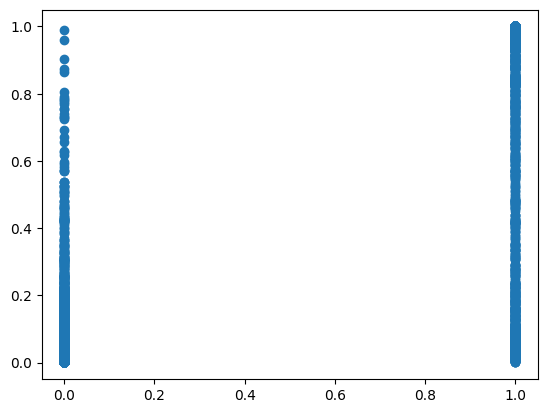

In [168]:
plt.scatter(y_test,y_pred)

In [170]:
df_y['y_pred_nn']=y_pred

In [171]:
df_y.head(20)

,y_test,y_pred,y_pred_nn
19448,0,0,0.031047
17530,1,1,0.925044
8723,0,0,0.013764
26749,1,1,0.999941
6236,1,0,0.146205
23061,0,0,0.018680
12349,0,0,0.029188
25880,0,0,0.013245
32397,0,0,0.050373
5684,0,0,0.007249
